<a href="https://colab.research.google.com/github/KomalPriya9320/Classification-Mobile-Price-Range-Prediction/blob/main/Komal_Classification_Mobile_Price_Range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **GitHub Link -**

https://github.com/KomalPriya9320/Classification-Mobile-Price-Range-Prediction.git

# **Problem Statement**


**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Mobile Price Prediction - Komal Priyadarshini/data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(df.shape)

(2000, 21)


### Dataset Information

In [80]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  ram            2000 non-null   int64  
 12  sc_h           2000 non-null   int64  
 13  sc_w           2000 non-null   int64  
 14  talk_time      2000 non-null   int64  
 15  three_g        2000 non-null   int64  
 16  touch_screen   2000 non-null   int64  
 17  wifi           2000 non-null   int64  
 18  price_ra

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

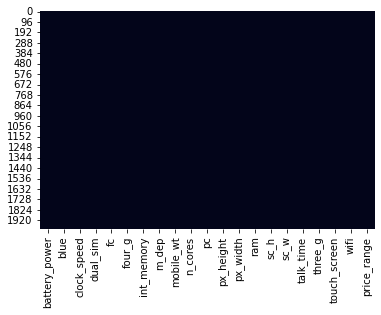

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

####Our Dataset has total 2000 no. of rows and 21 columns. Our dataset has no duplicate value and no null values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega 
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Price

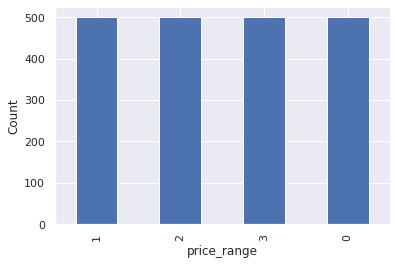

In [13]:
# Chart - 1 visualization code
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

There are mobile phones in 4 price ranges. The number of elements is almost similar.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We have almost equal number of obseravtions for each category.
we don't have imbalanced target variable.Accuracy score will be the best evalaution metric.***

***This is the target variable with value of***
* ***0=low cost,***
* ***1=medium cost,***
* ***2=high cost,***
* ***3=very high cost.***

#### Chart - 2 -  Battery Power

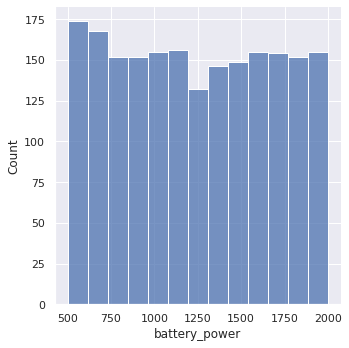

In [14]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(df["battery_power"])
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

This plot shows how the battery mAh is spread.
There is a gradual increase as the price range increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As the Battery_power increases the price also increases.

#### Chart - 3 - Bluetooth

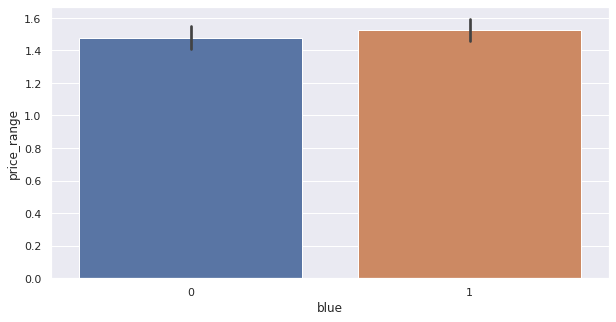

In [15]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

This Chart shows that  half the devices have Bluetooth, and half don’t.

#### Chart - 4 - RAM

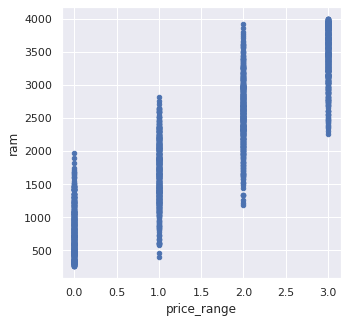

In [16]:
# Chart - 4 visualization code
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots' primary uses are to observe and show relationships between two numeric variables.

##### 2. What is/are the insight(s) found from the chart?

Ram has continuous increase with price range while moving from Low cost to Very high cost.

#### Chart - 5 - Pixel_width

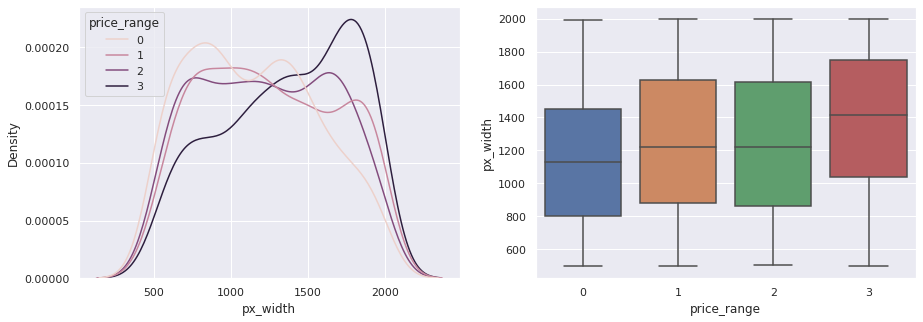

In [17]:
# Chart - 5 visualization code
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width.
so we can say that it would be a driving factor in deciding price_range.


#### Chart - 6 - Pixel_height

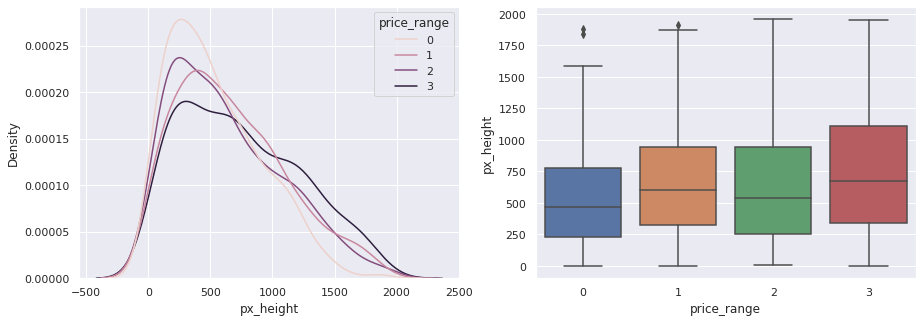

In [18]:
# Chart - 6 visualization code
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

#### Chart - 7 - Front Camera Megapixel

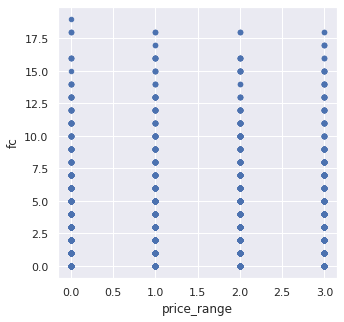

In [19]:
# Chart - 7 visualization code
df.plot(x='price_range',y='fc',kind='scatter')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots' primary uses are to observe and show relationships between two numeric variables.

##### 2. What is/are the insight(s) found from the chart?

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

#### Chart - 8 - Primary Camera Megapixel

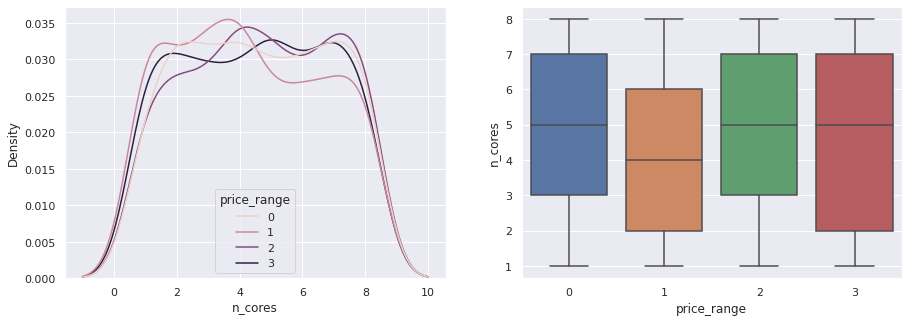

In [20]:
# Chart - 8 visualization code
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.



#### Chart - 9 - Mobile Weight

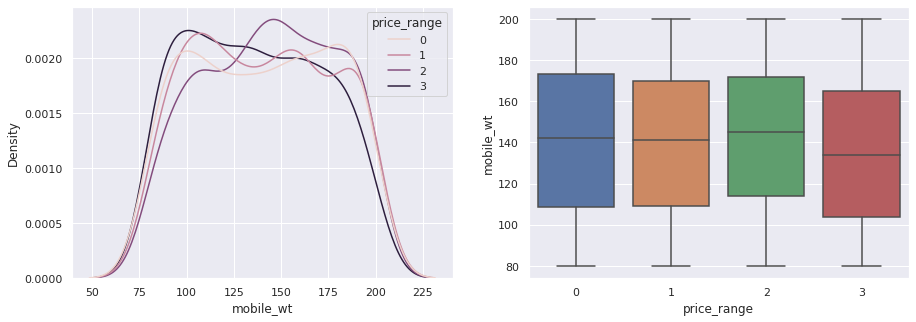

In [21]:
# Chart - 9 visualization code
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

From this chart we can see that costly phones are lighter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see lighter phones are heavy and heavy phones are cheaper. It also reflect people preference as nowadays people prefer light phone for easy convenience.

#### Chart - 10 - Screen Size

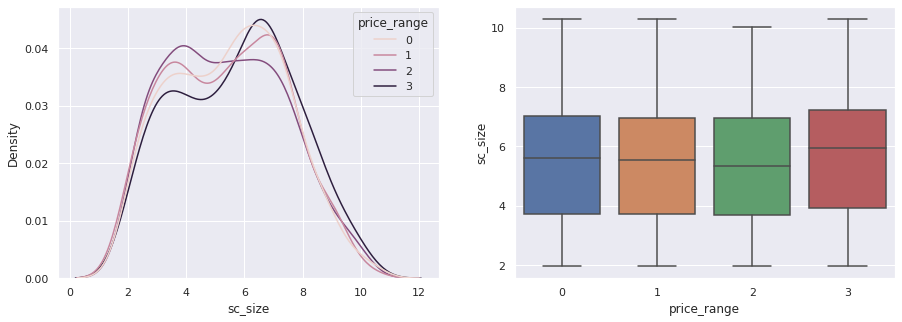

In [22]:
# Chart - 10 visualization code
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()


##### 1. Why did you pick the specific chart?

kdeplot() function is used to plot the data against a single/univariate variable.
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

#### Chart - 11 - Binary Feature

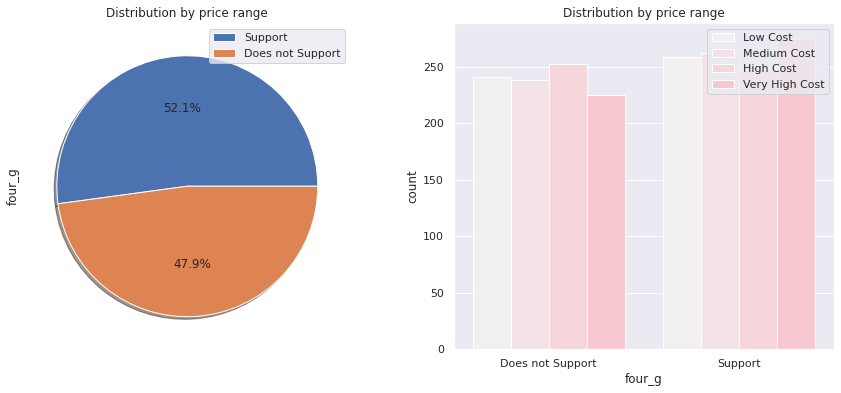

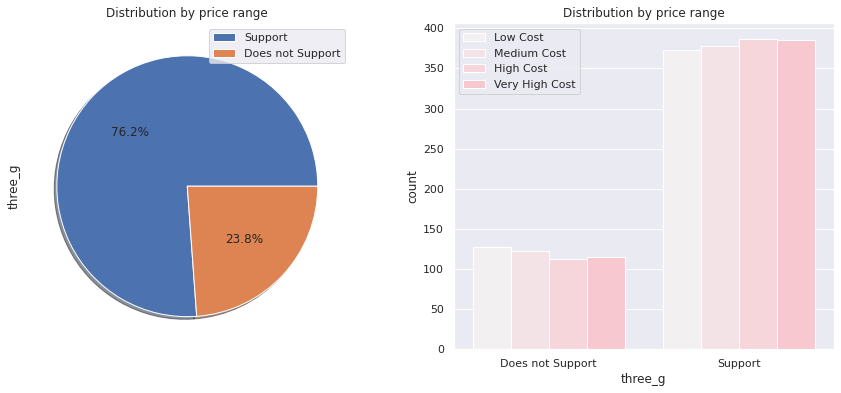

In [23]:
# Chart - 11 visualization code
binary_features = [ 'four_g', 'three_g']

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

feature 'three_g' play an important feature in prediction.

#### Chart - 12 - Correlation Heatmap

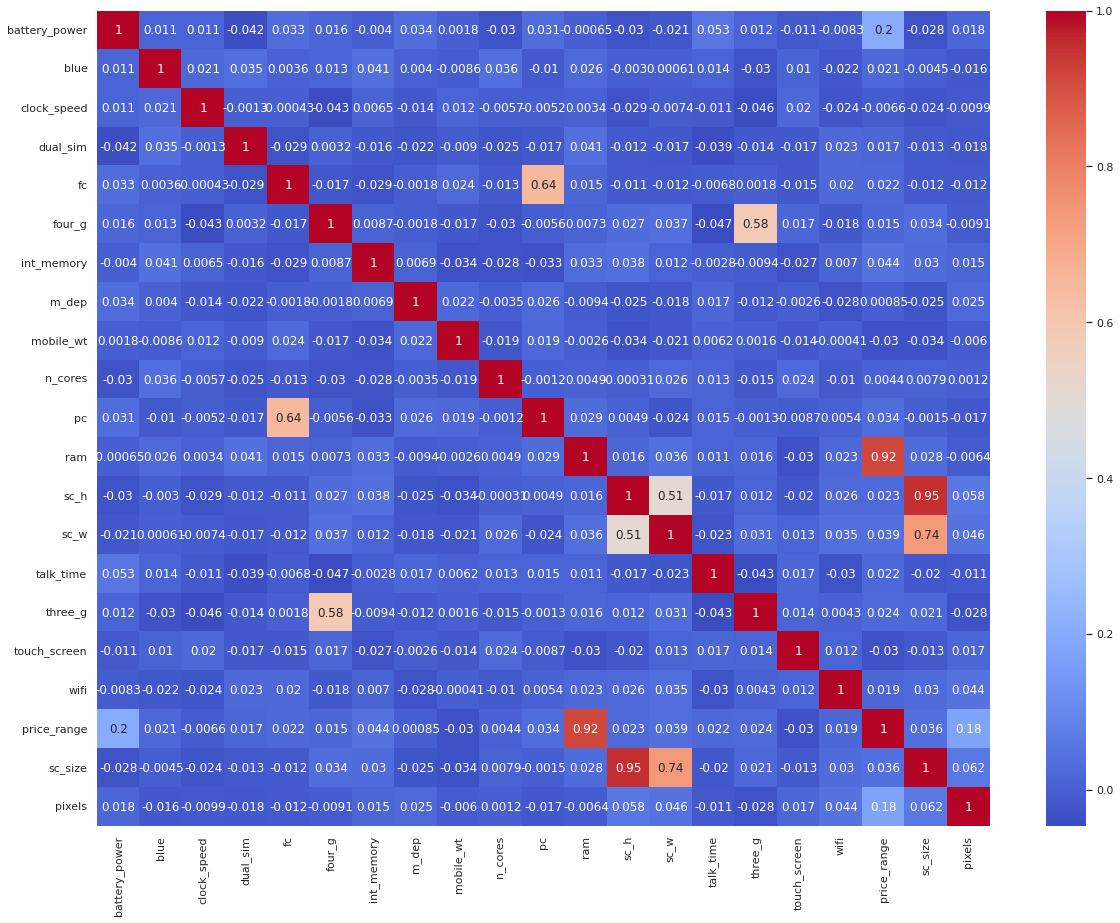

In [24]:
# Correlation Heatmap visualization code
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

RAM and price_range shows high correlation which is a good sign, it signifies 
that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.
Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
pixels           0
dtype: int64


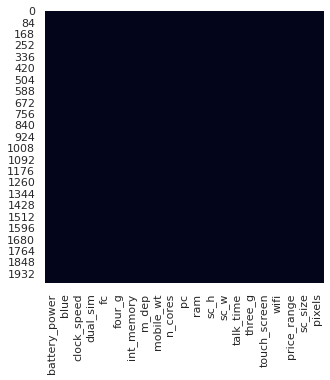

In [25]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

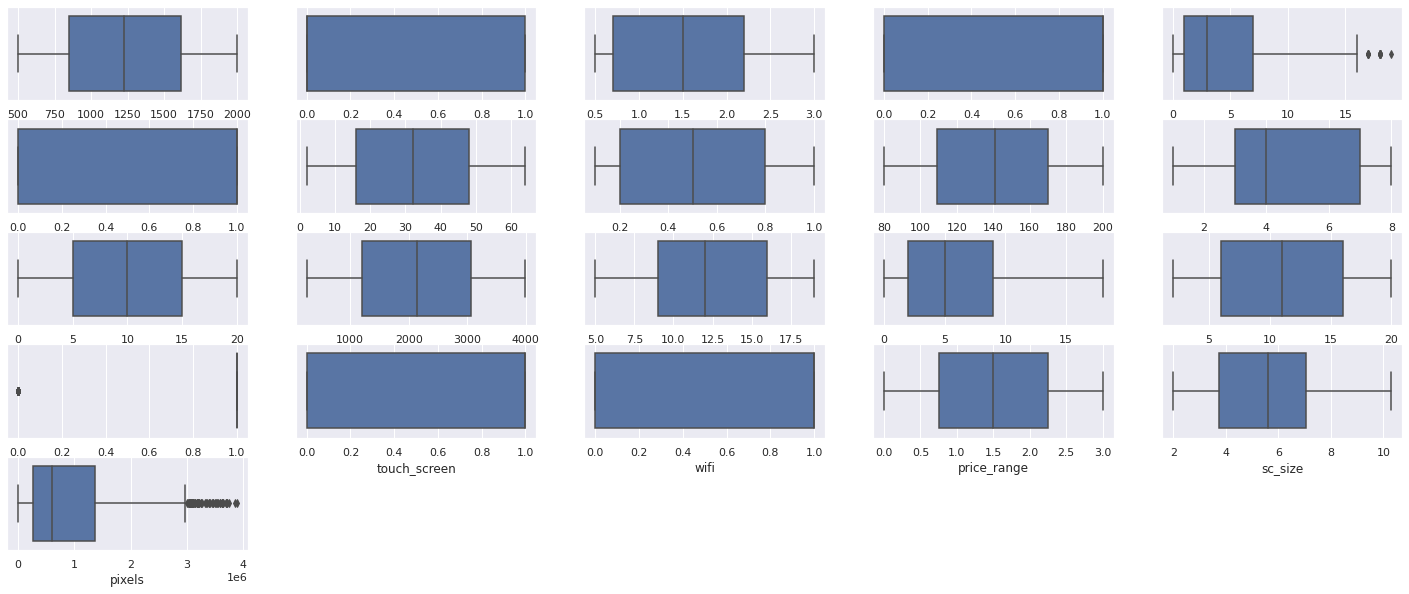

In [26]:
# Handling Outliers & Outlier treatments
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are not much outliers.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [27]:
# Transform Your data
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [28]:
X.shape

(2000, 20)

In [29]:
y.shape

(2000,)

### 4. Data Scaling

In [30]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

We use minmaxscaler to scale our data. MinMaxScaler doesn't reduce the importance of outliers.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

Essentially where high dimensions are a problem or where it is a particular point in the algorithm to dimension reduction.

Hard rules are hard to state, other than “after you have tried it, did it improve matters”, which isn’t always the most useful guidance.

Instead, looking at why we might want to do this we can get a bit of insight. Admittedly some of the following might blur together a bit at the edges but the aim is to give a flavour.

1. Our data are too big. 4 million rows. 50,000 columns… is there a lot of redundancy there? Building a model on this could be very expensive. Even relatively simple dimension reduction techniques like PCA can capture almost all of the information in a fraction of the memory if there are strong relationships (that can be linearly approximated) in the data.

2. We are over-fitting. If you build a model with tens of thousands of degrees of freedom but don’t have a lot of examples you can easily overfit. Dimension reduction is one way of handling this, though often not the the best

3. We want to bring in external data. OK, this is a bit different but worth a note. In applications like word2vec we want to build a classifier using an embedding. We may want to classify some text into different categories but with only a limited number of examples. The complexity of free text is vast but a low dimension embedding is much smaller and will not overfit so badly in a classifier. Building a low dimensional embedding on external text, applying it to the text to be classified then building a classifier is using dimension reduction to bring in external data.

4. We suffer from the curse of dimesnionality. Consider something like a nearest neighbour search. As the number of dimensions gets large we see some unwanted behaviour, especially if we are looking at things like euclidean distances. Projecting your data to a lower dimensional space for nearest neighbour, clustering or outlier detection can be both more robust and more meaningful.

5. Some tools are all about this. Collaborative filtering through matrix factorisation is an example. Can we approximately describe behaviour as a linear combination of a smaller number of preferences/behaviours?

### 6. Data Splitting

In [31]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [32]:
X_train.shape

(1600, 20)

In [33]:
y_train.shape

(1600,)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 7. Feature Selection


In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
#No we Will select the  top 12 important features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)

In [36]:
# creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [37]:
# conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [38]:
# Check dataframe
featureScores

,Specs,Score
0,battery_power,1.412987e+04
1,blue,7.232323e-01
2,clock_speed,6.483659e-01
3,dual_sim,6.310108e-01
4,fc,1.013517e+01
5,four_g,1.521572e+00
6,int_memory,8.983912e+01
7,m_dep,7.458196e-01
8,mobile_wt,9.597286e+01
9,n_cores,9.097556e+00


## ***7. ML Model Implementation***

In [52]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [40]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')

### ML Model - 1 - Implementing Logistic Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [41]:
# ML Model - 3 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [42]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [43]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [44]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.91625
The accuracy on test data is  0.9


In [45]:
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(test_class_preds, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.85      0.88      0.86        88
           2       0.84      0.83      0.83        93
           3       0.93      0.94      0.93       111

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
# Confusion matrix for test set.

cf_matrix=confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[102,   3,   0,   0],
       [  6,  77,   8,   0],
       [  0,   8,  77,   7],
       [  0,   0,   8, 104]])

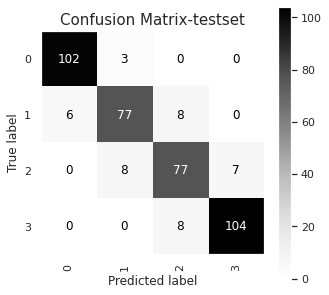

In [47]:
# plotting confusion matrix for test set.
plot_confusion_matrix(clf,X_test,y_test,cmap='Greys',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

### ML Model - 2 - **Implementing Random Forest Classifier**

In [56]:
# ML Model - 1 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [57]:
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.8775


In [58]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf_model.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.480468
1,battery_power,0.077161
2,pixels,0.070192
3,mobile_wt,0.040669
4,int_memory,0.038759


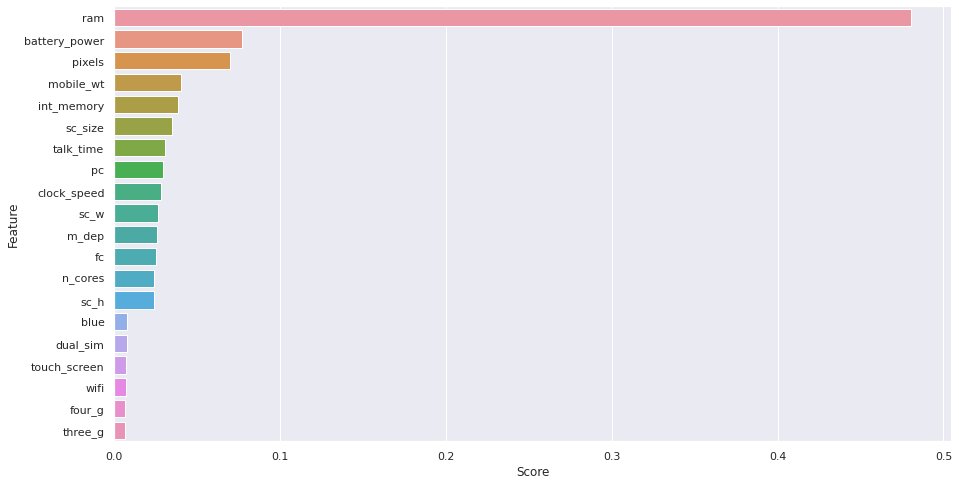

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


* ***Train accuarcy is 100% and test accuracy is 87%. which is quite good. But model seems to be overfitted and has not generalised the data well. We need to reduce overfitting and improve the model performance.***
* ***we do some hyperparameter tunning to reduce overfitting***

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# Confusion matrix for test set.

cf_matrix=confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[101,   4,   0,   0],
       [  6,  78,   7,   0],
       [  0,  10,  75,   7],
       [  0,   0,  15,  97]])

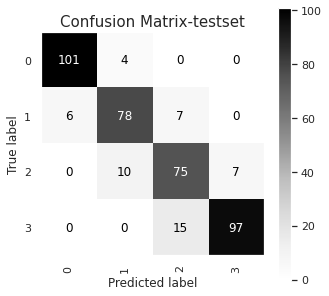

In [61]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rf_model,X_test,y_test,cmap='Greys',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [62]:
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.86      0.85        91
           2       0.77      0.82      0.79        92
           3       0.93      0.87      0.90       112

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.88      0.88      0.88       400



In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques
# para_grid values to pass in gridsearchcv.
grid_values={'n_estimators':[300, 400, 500, 700],
          'max_depth':[None, 10, 20, 40],
          'min_samples_split':[2,6,10],
          'max_leaf_nodes':[None],
          'criterion':['entropy','gini'],
          'max_features':['auto','log2','sqrt']
          
             }

In [64]:
# creating the instance 
rf_model= RandomForestClassifier(random_state=0)

In [65]:
# Applying GridSearchCV
rf_model_tune=GridSearchCV(rf_model,param_grid=grid_values,cv=3,verbose=3,scoring='accuracy')
rf_model_tune.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.880 total time=   1.3s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.871 total time=   1.3s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=300;, score=0.827 total time=   1.4s
[CV 1/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.876 total time=   1.8s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.865 total time=   1.9s
[CV 3/3] END criterion=entropy, max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=400;, score=0.826 to

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [None],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [300, 400, 500, 700]},
             scoring='accuracy', verbose=3)

In [66]:
#Getting best paramters for the models
rf_model_tune.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 2,
 'n_estimators': 500}

In [67]:
# predicting y values of train and test set.
y_train_pred=rf_model_tune.predict(X_train)
y_pred=rf_model_tune.predict(X_test)

In [68]:
# Checking the accuarcy score of train set.
accuracy_score(y_train,y_train_pred)

1.0

In [69]:
# Checking the accuarcy score of test set.
accuracy_score(y_test,y_pred)

0.88

In [70]:
# getting confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[100,   5,   0,   0],
       [  6,  74,  11,   0],
       [  0,   8,  78,   6],
       [  0,   0,  12, 100]])

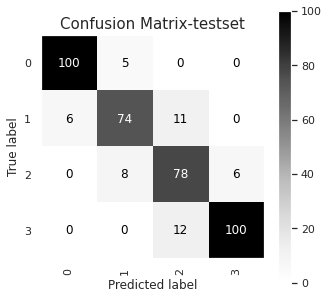

In [71]:
# plotting confusion matrix for test set.
plot_confusion_matrix(rf_model_tune,X_test,y_test,cmap='Greys',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

###**Observations of Random Forest:**
***Before Tuning***
* ***training accuarcy = 100%***
* ***test accuarcy = 88%***

***Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.***

***After tuning:***
* ***Training accuarcy= 100%***
* ***Test accuarcy = 90%***

***we have slightly improved the model and overfitting is reduced slightly.***


### ML Model - 3 - **Implementing XgBoost Classifier**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart
# Create an instance 
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [73]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.97875
The accuracy on test dataset is 0.875


#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[97,  8,  0,  0],
       [ 7, 80,  4,  0],
       [ 0,  9, 77,  6],
       [ 0,  0, 16, 96]])

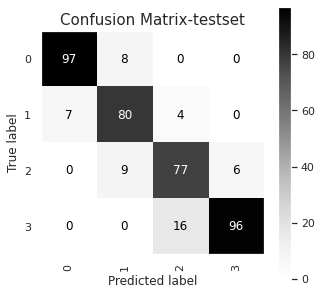

In [75]:
# plotting confusion matrix for test set.
plot_confusion_matrix(xg_model,X_test,y_test,cmap='Greys',xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

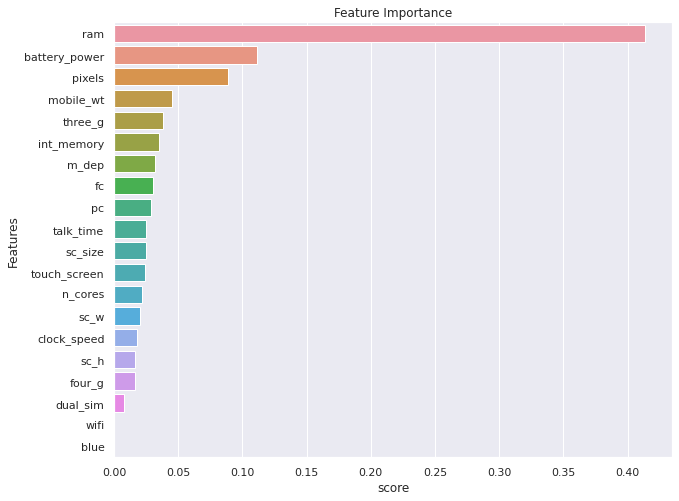

In [76]:
#plotting feature importances
plot_feature_importance(xg_model)

##### Which hyperparameter optimization technique have you used and why?

In [77]:
# Cross validation

grid = GridSearchCV(xg_model, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.825 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.850 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [78]:
#Getting best paramters for the models
grid.best_params_

{'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### **Observations**

***Before hyperparameter Tuning***
* ***Train Accuarcy = 98%***
* ***Test Accuarcy = 90%***

***After hyperparameter Tuning***
* ***Train Accuarcy = 1%***
* ***Test Accuarcy = 92%***

***we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is  more than 5%.We can say model is very slightly overfitted***



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 

That's why I have used GridsearCV method for hyperparameter optimization.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized. first of all I need accuracy for the churn prediction and time isn't a constrain here, beacuse the data is not lke swiggy or ola which booking needs to be faster. Thus, for greater accuracy we used kernel SVM, Random Forest, XgBoost kind of ensembel r=techniques. So, I tried both Random Forest and XGBoost. Here is their ealuation metrics and I would like to compare.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [79]:
help(plot_feature_importance)

Help on function plot_feature_importance in module __main__:

plot_feature_importance(algo)
    Takes the alogorithm as input and 
    plots the feature importance graph



I have created a function Defination named **plot_feature_importance** as the function takes the algorithm as an input and plots the featuren importance graph. i have used feature importance in Random Forest Classifier and XG Boost classifier.

# **Conclusion**

#Conclusion

From EDA we can see that

1.   Here are mobile phones in 4 price ranges.
2.   The number of elements is  almost similar.
3.   Half the devices have Bluetooth, and half don’t.
4.   There is a gradual increase in battery as the price range increases.
5.   Ram has continuous increase with price range while moving from Low cost   to   Very high cost.
6.   Costly phones are lighter.
7.   RAM, battery power, pixels played more significant role in deciding the price range of mobile  phone.
8.   From all the above experiments we can conclude that logistic regression and, XGboosting with  using hyperparameters we got the best results.
9.   The accuracy and performance of the model is evaluated by using confusion matrix.











### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***